In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing  import LabelEncoder


In [2]:
df = pd.read_csv(r'D:\Derin Öğrenme\Dataset\survey lung cancer.csv')
label_encoder = LabelEncoder().fit(df.LUNG_CANCER)
labels = label_encoder.transform(df.LUNG_CANCER)
classes = list(label_encoder.classes_)

In [3]:
X = df.drop(["LUNG_CANCER"],axis = 1)
y = labels

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=15, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(2, activation="softmax"))  # 2 sınıflı bir problem için çıktı boyutu (None, 2)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 2)                 26        
                                                                 
Total params: 486 (1.90 KB)
Trainable params: 486 (1.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=500)

Epoch 1/500
8/8 [==============================] - 1s 30ms/step - loss: 1.0941 - accuracy: 0.2996 - val_loss: 1.1661 - val_accuracy: 0.2742
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 0.9531 - accuracy: 0.3320 - val_loss: 1.0154 - val_accuracy: 0.3548
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 0.8378 - accuracy: 0.4494 - val_loss: 0.8903 - val_accuracy: 0.4355
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 0.7453 - accuracy: 0.5466 - val_loss: 0.7835 - val_accuracy: 0.5323
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 0.6669 - accuracy: 0.6680 - val_loss: 0.6969 - val_accuracy: 0.5806
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 0.6030 - accuracy: 0.7166 - val_loss: 0.6224 - val_accuracy: 0.6290
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 0.5487 - accuracy: 0.7854 - val_loss: 0.5595 - val_accuracy: 0.7903
Epoch 8/500
8/8 [=========

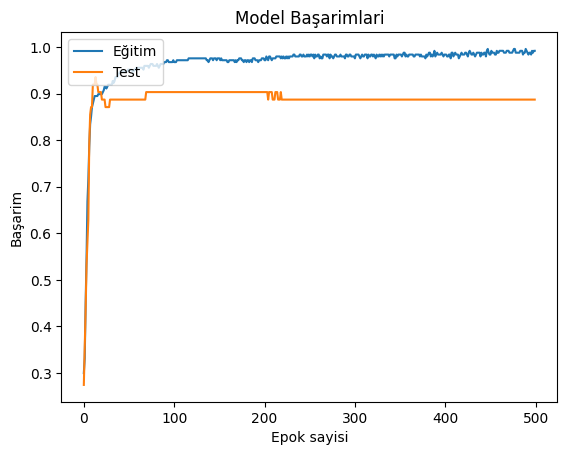

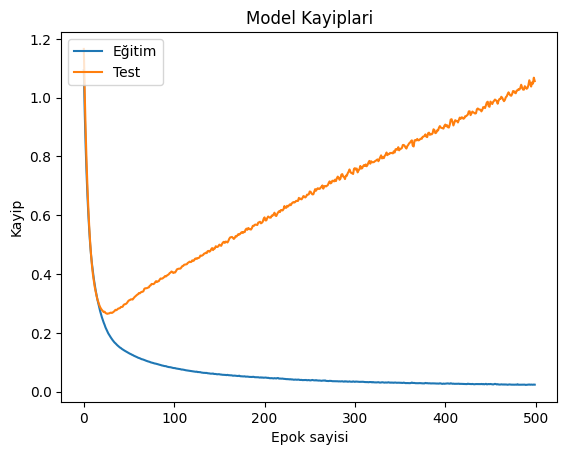

In [7]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Başarimlari")
plt.ylabel("Başarim")
plt.xlabel("Epok sayisi")
plt.legend(["Eğitim","Test"], loc="upper left")
plt.show()

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Kayiplari")
plt.ylabel("Kayip")
plt.xlabel("Epok sayisi")
plt.legend(["Eğitim","Test"], loc="upper left")
plt.show()